[array([[ 0.63776535, -0.52964403],
       [-0.35301216,  0.48279762],
       [ 0.4352085 , -0.24529156]]), array([[ 0.63923324],
       [-0.33151433],
       [ 0.82240905]])]
[array([[ 0.63776535, -0.52964403],
       [-0.35301216,  0.48279762],
       [ 0.4352085 , -0.24529156]]), array([[ 0.63923324],
       [-0.33151433],
       [ 0.82240905]])]
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000


Text(0, 0.5, 'MSE')

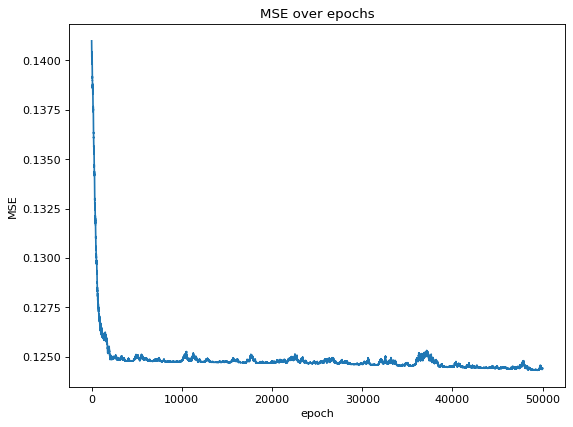

In [119]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivate(x):
    return x*(1-x)

layers = [2,2,1]
#np.random.seed(1000)

weights = []
for layer in range(len(layers) - 1):
    w = 2 * np.random.rand(layers[layer] + 1, layers[layer+1]) - 1
    weights.append(w)

print(weights)
#weights = [np.array([ np.array([0.0,0.0]), np.array([0.0,0.0]), np.array([0.0,0.0])]),np.array([ np.array([0.0]), np.array([0.0]), np.array([0.0])])]
print(weights)
mses = []
def forward_prop(x, activity, weights):
    y = x
    for i in range(len(weights)-1):
        activation = np.dot(y[i], weights[i])
        activity2 = activity(activation)

        # add the bias for the next layer
        activity2 = np.concatenate((np.ones(1), np.array(activity2)))
        y.append(activity2)

    activation = np.dot(y[-1], weights[-1])
    activity2 = activity(activation)
    #print(activity2)
    #print(x)
   
    y.append(activity2)
        
    return y


def back_prop( y, target, learning_rate, activity_derivative, weights):
    error = target - y[-1]
    delta_vec = [error * activity_derivative(y[-1])]

    # we need to begin from the back, from the next to last layer
    for i in range(len(layers)-2, 0, -1):
        error = delta_vec[-1].dot(weights[i][1:].T)
        error = error*activity_derivative(y[i][1:])
        delta_vec.append(error)

    # Now we need to set the values from back to front
    delta_vec.reverse()
    
    # Finally, we adjust the weights, using the backpropagation rules
    for i in range(len(weights)):
        layer = y[i].reshape(1, layers[i]+1)
        delta = delta_vec[i].reshape(1, layers[i+1])
        weights[i] += learning_rate*layer.T.dot(delta)

    return weights
count,total = 0,0
acc = []
def fit(data, labels, learning_rate=0.01, epochs=100, weights=[]):
    global count, total
    # Add bias units to the input layer - 
    # add a "1" to the input data (the always-on bias neuron)
    ones = np.ones((1, data.shape[0]))
    Z = np.concatenate((ones.T, data), axis=1)
    
    for k in range(epochs):
        if (k+1) % 10000 == 0:
            print('epochs: {}'.format(k+1))
    
        sample = np.random.randint(X.shape[0])

        # We will now go ahead and set up our feed-forward propagation:
        x = [Z[sample]]
        #print(x)
        y = forward_prop(x, sigmoid, weights)
        out = 1 if y[2][0] > 0.5 else 0
        #print(out,x[0],out != (x[0][1]==x[0][2]))
        if out == (x[0][1]==x[0][2]):
            #print(out,y[2][0],x[0])
            count +=1
        total += 1
        if total % 100 == 0:
            acc.append(count/total)
            total = 0
            count = 0
        xx = [[[1,0,0]],[[1,0,1]],[[1,1,0]],[[1,1,1]]]
        error = 0
        for x in xx:
            z = forward_prop(x, sigmoid, weights)
            a = 1
            if(x[0][1]==x[0][2]):
                a = 0
            error += (1/2)*(a - z[2][0])*(a - z[2][0])
        mses.append(error/4)
        #Now we do our back-propagation of the error to adjust the weights:
        target = labels[sample]
        weights = back_prop(y, target, learning_rate, sigmoid_derivate, weights)

X = np.array([[0, 0], [0, 1],
                [1, 0], [1, 1]])

# Set the labels, the correct results for the xor operation
Y = np.array([0, 1, 
                 1, 0])

# Call the fit function and train the network for a chosen number of epochs
fit(X, Y, epochs=50000, weights=weights)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(range(len(mses)),mses)
plt.title('MSE over epochs')
plt.xlabel('epoch')
plt.ylabel('MSE')
#print(total)
#print(count)

Text(0, 0.5, 'Missclassification rate')

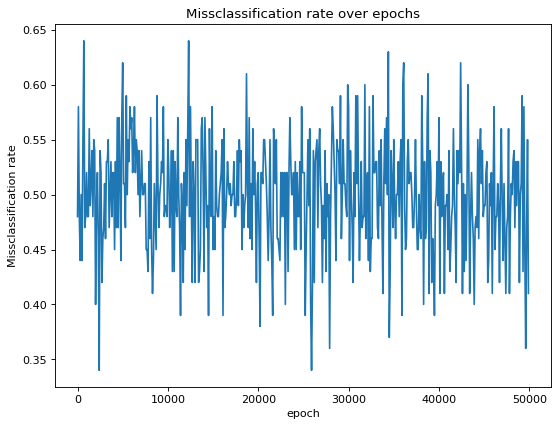

In [110]:
figure(figsize=(8, 6), dpi=80)
plt.plot(np.array(range(len(acc))) * 100,acc)
plt.title('Missclassification rate over epochs')
plt.xlabel('epoch')
plt.ylabel('Missclassification rate')

In [80]:
def predict_single_data(x, activity):
    val = np.concatenate((np.ones(1).T, np.array(x)))
    for i in range(0, len(weights)):
        val = activity(np.dot(val, weights[i]))
        val = np.concatenate((np.ones(1).T, np.array(val)))
    return val[1]


def predict(X):
    Y = np.array([]).reshape(0, layers[-1])
    for x in X:
        y = np.array([[predict_single_data(x)]])
        Y = np.vstack((Y,y))
    return Y

print("Final prediction")
for s in X:
    print(s, predict_single_data(s, sigmoid))

Final prediction
[0 0] 0.07716402033423651
[0 1] 0.9343567423638066
[1 0] 0.9088864799339437
[1 1] 0.0680352236112791
